## Initialize

Create references to Azure resources

In [16]:
region = 'westeurope'
subscription_key = ""
language = "en"
vision_base_url = "https://{}.api.cognitive.microsoft.com/vision/v2.0/".format(region)
_maxNumRetries = 10


In [15]:
!pip install opencv-python

     |████████████████████████████████| 28.2MB 8.4kB/s eta 0:00:01    |███▏                            | 2.8MB 5.3MB/s eta 0:00:05     |████                            | 3.5MB 5.3MB/s eta 0:00:05     |████▋                           | 4.1MB 1.7MB/s eta 0:00:15     |█████████████████████████▏      | 22.1MB 2.9MB/s eta 0:00:03     |██████████████████████████▏     | 23.1MB 2.9MB/s eta 0:00:02     |███████████████████████████▏    | 23.9MB 2.9MB/s eta 0:00:02     |████████████████████████████▌   | 25.1MB 794kB/s eta 0:00:04
You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline 
# Display images within Jupyter

## Analyze image

Create

In [3]:
vision_analyze_url = vision_base_url + "analyze"


To begin analyzing an image, set image_url to the URL of any image that you want to analyze.

In [4]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

The following block uses the requests library in Python to call out to the Computer Vision analyze API and return the results as a JSON object. The API key is passed in via the headers dictionary and the types of features to recognize via the params dictionary. To see the full list of options that can be used, refer to the REST API documentation for image analysis.

In [5]:
import requests
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

The analysis object contains various fields that describe the image. The most relevant caption for the image can be obtained from the descriptions property.

In [6]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

A group of people on a city street at night


The following lines of code display the image and overlay it with the inferred caption.

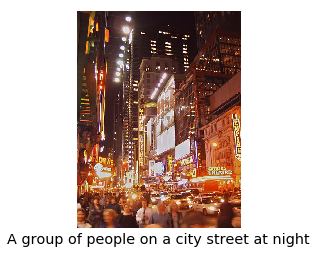

In [7]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

## Celebrity identification

Along the same lines, the domain-specific model for identifying celebrities can be invoked as shown next. First set image_url to point to the image of a celebrity.

In [9]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Bill_gates_portrait.jpg"

The service endpoint for detecting celebrity images can be constructed as follows:

In [10]:
celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"

Next, the image in image_url can be analyzed for celebrities

In [11]:

headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'celebrities'}
data     = {'url': image_url}
response = requests.post(celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

In [12]:
print(analysis)

{'result': {'celebrities': [{'faceRectangle': {'top': 126, 'left': 157, 'width': 185, 'height': 185}, 'name': 'Bill Gates', 'confidence': 0.9999994039535522}]}, 'requestId': '92c39b9d-60b1-49e2-b84a-ab7f3358492c', 'metadata': {'width': 550, 'height': 521, 'format': 'Jpeg'}}


The following lines of code extract the name and bounding box for one of the celebrities found:

In [13]:
assert analysis["result"]["celebrities"] is not []
celebrity_info = analysis["result"]["celebrities"][0]
celebrity_name = celebrity_info["name"]
celebrity_face = celebrity_info["faceRectangle"]

Next, this information can be overlaid on top of the original image using the following lines of code:

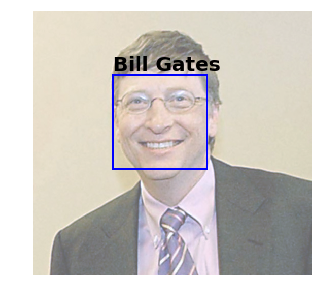

In [14]:

from matplotlib.patches import Rectangle
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.6)
origin = (celebrity_face["left"], celebrity_face["top"])
p      = Rectangle(origin, celebrity_face["width"], celebrity_face["height"], 
                   fill=False, linewidth=2, color='b')
ax.axes.add_patch(p)
plt.text(origin[0], origin[1], celebrity_name, fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

## OCR with Read API 

Read image and display


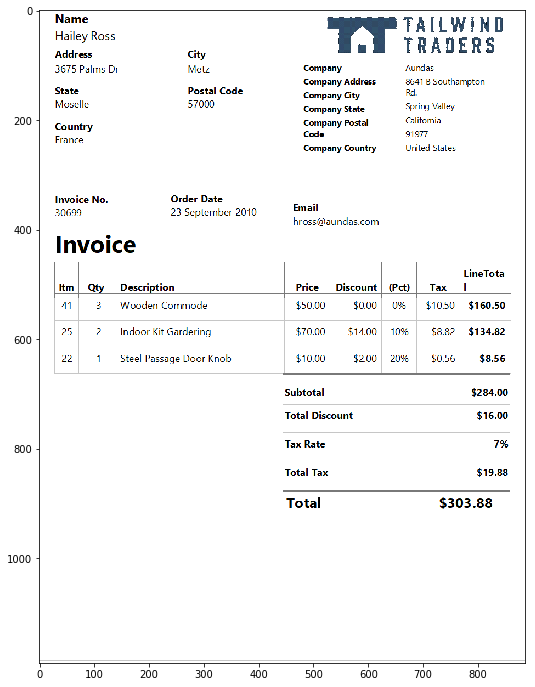

In [127]:
#pathToFileInDisk ="Invoice30699.pdf"
pathToFileInDisk ="Invoice.png"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(pathToFileInDisk)
plt.subplots(figsize=(12, 12))
plt.imshow(image)
plt.show()




First call to obtain the operation id

In [133]:
import http.client, urllib.request, urllib.parse, urllib.error, base64



headers = {
    # Request headers
    # 'Content-Type': 'application/json',
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = urllib.parse.urlencode({
    # Request parameters
    'language': language,
})

with open(pathToFileInDisk, 'rb') as f:
    body = f.read()

try:
    conn = http.client.HTTPSConnection('westeurope.api.cognitive.microsoft.com')
    conn.request("POST", "/vision/v3.0-preview/read/analyze?%s" % params, body, headers)
    response = conn.getresponse()
    if response.status==202 :
        data = response.read()
        print(data)
    else :
        #manage response
        print("Response {}".format(response.status))
    
    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################

b''


Get Operation ID from the response

In [117]:
response.getheaders()

[('Content-Length', '0'),
 ('Operation-Location',
  'https://westeurope.api.cognitive.microsoft.com/vision/v3.0-preview/read/analyzeResults/4796e462-6959-47d1-8ec0-4e44613330d3'),
 ('x-envoy-upstream-service-time', '111'),
 ('apim-request-id', '4796e462-6959-47d1-8ec0-4e44613330d3'),
 ('Strict-Transport-Security', 'max-age=31536000; includeSubDomains; preload'),
 ('x-content-type-options', 'nosniff'),
 ('Date', 'Mon, 24 Feb 2020 15:48:03 GMT')]

In [118]:
operationURL = response.getheader("Operation-Location")
operationId = operationURL.split("/")[-1]

In [119]:
operationId

'4796e462-6959-47d1-8ec0-4e44613330d3'

Second call to obtain the OCR result 

In [120]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json


headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('westeurope.api.cognitive.microsoft.com')
    conn.request("GET", "/vision/v3.0-preview/read/analyzeResults/" +operationId+"?%s" % params, "", headers)
    response = conn.getresponse()
    data = response.read()
    conn.close()
    results = json.loads(data.decode('utf-8'))
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))


In [121]:
results

{'status': 'succeeded',
 'createdDateTime': '2020-02-24T15:48:03Z',
 'lastUpdatedDateTime': '2020-02-24T15:48:04Z',
 'analyzeResult': {'version': '3.0.0',
  'readResults': [{'page': 1,
    'language': 'en',
    'angle': 0.2755,
    'width': 886,
    'height': 1191,
    'unit': 'pixel',
    'lines': [{'language': 'en',
      'boundingBox': [25, 7, 91, 5, 92, 26, 25, 27],
      'text': 'Name',
      'words': [{'boundingBox': [29, 7, 91, 6, 92, 26, 29, 28],
        'text': 'Name',
        'confidence': 0.959}]},
     {'language': 'en',
      'boundingBox': [661, 10, 849, 10, 849, 44, 661, 44],
      'text': 'TAILWIND',
      'words': [{'boundingBox': [665, 12, 850, 11, 847, 45, 664, 42],
        'text': 'TAILWIND',
        'confidence': 0.91}]},
     {'language': 'en',
      'boundingBox': [25, 36, 143, 36, 143, 59, 25, 59],
      'text': 'Hailey Ross',
      'words': [{'boundingBox': [27, 37, 88, 37, 88, 60, 26, 60],
        'text': 'Hailey',
        'confidence': 0.958},
       {'boundi

Utility to show extracted results onto the image

In [122]:
def showResultOnImage( results, img ):
    
    """Display the obtained results onto the input image"""
    img = img[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img, aspect='equal')

    lines = results["analyzeResult"]["readResults"][0]["lines"]

    for i in range(len(lines)):
        words = lines[i]['words']
        for j in range(len(words)):
            tl = (words[j]['boundingBox'][0], words[j]['boundingBox'][1])
            tr = (words[j]['boundingBox'][2], words[j]['boundingBox'][3])
            br = (words[j]['boundingBox'][4], words[j]['boundingBox'][5])
            bl = (words[j]['boundingBox'][6], words[j]['boundingBox'][7])
            text = words[j]['text']
            x = [tl[0], tr[0], tr[0], br[0], br[0], bl[0], bl[0], tl[0]]
            y = [tl[1], tr[1], tr[1], br[1], br[1], bl[1], bl[1], tl[1]]
            line = Line2D(x, y, linewidth=3.5, color='red')
            ax.add_line(line)
            ax.text(tl[0], tl[1] - 2, '{:s}'.format(text),
            bbox=dict(facecolor='blue', alpha=0.5),
            fontsize=14, color='white')

    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    plt.show()

In [123]:
response.status

200

Show Resulsts


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


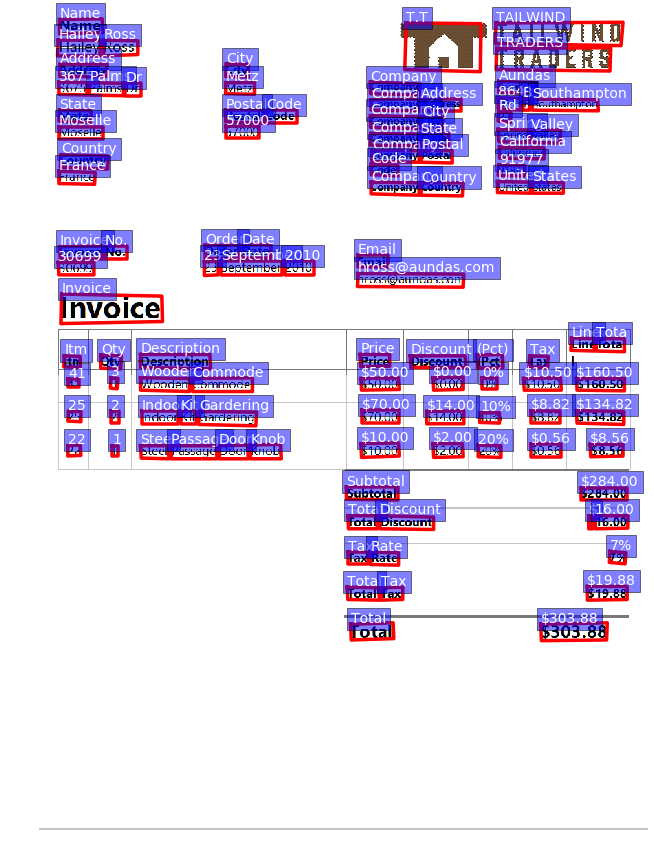

In [124]:
if response is not None and response.status == 200:
    print("Show Resulsts")
    data8uint = np.fromstring(body, np.uint8)  # Convert string to an unsigned int array
    img = cv2.cvtColor(cv2.imdecode(data8uint, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    showResultOnImage(results, img)